/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

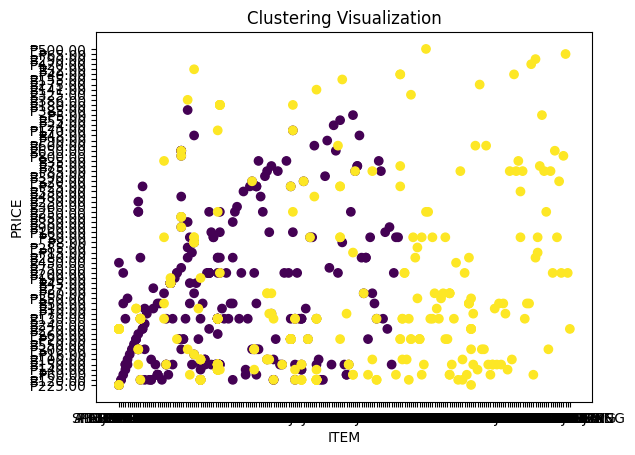

Best Number of Clusters: 2
Silhouette Score: 0.6250557936380189
      ID TRANSACTION  BRAND             ITEM  QUANTITY    PRICE        DATE  \
0      1          T1  HONDA       PETRON OIL       1.0  ₱225.00  01/03/2023   
1      2          T1  HONDA      TIRE SYLANT       1.0  ₱120.00  01/03/2023   
2      3          T1  HONDA             PITO       1.0   ₱60.00  01/03/2023   
3      4          T1  HONDA        TIRE GOMA       1.0  ₱140.00  01/03/2023   
4      5          T1  HONDA        TIRE GOMA       1.0  ₱150.00  01/03/2023   
..   ...         ...    ...              ...       ...      ...         ...   
595  596        T123   RUSI  IGNITION SWITCH       1.0  ₱500.00  03/09/2023   
596  597        T123   RUSI   THROTTLE CABLE       1.0  ₱100.00  03/09/2023   
597  598        T123   RUSI       AIR FILTER       1.0  ₱150.00  03/09/2023   
598  599        T123   RUSI    CLUTCH SPRING       1.0  ₱220.00  03/09/2023   
599  600        T123   RUSI             TAPE       1.0   ₱20.00  03

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data from the CSV file
data = pd.read_csv('dataset.csv')

data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0

df = pd.DataFrame(data)

# Drop a single column
df = df.drop('ID', axis=1)

# Perform one-hot encoding for categorical data
data_encoded = pd.get_dummies(data)

# Initialize variables to store the best silhouette score and corresponding cluster count
best_score = -1  # Initialize with a low value
best_num_clusters = 2  # Minimum number of clusters

# Create a range of cluster counts to try
cluster_range = range(2, 10)  # Adjust the range as needed

# Loop through different numbers of clusters and find the best one
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_encoded)
    silhouette_avg = silhouette_score(data_encoded, clusters)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = num_clusters

# Apply K-means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_encoded)

# Add cluster assignments back to the original dataframe
data['CLUSTER'] = clusters

# Visualize the clusters (assuming 2D data for simplicity)
plt.scatter(data['ITEM'], data['PRICE'], c=data['CLUSTER'], cmap='viridis')
plt.xlabel('ITEM')
plt.ylabel('PRICE')
plt.title('Clustering Visualization')
plt.show()

# Display the best number of clusters and silhouette score
print(f"Best Number of Clusters: {best_num_clusters}")
print(f"Silhouette Score: {best_score}")

# Add cluster labels to the DataFrame
data['CLUSTER_LABEL'] = f'Cluster {clusters}'  # You can customize the label format if needed

# Display the updated DataFrame with cluster labels
print(data)


/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


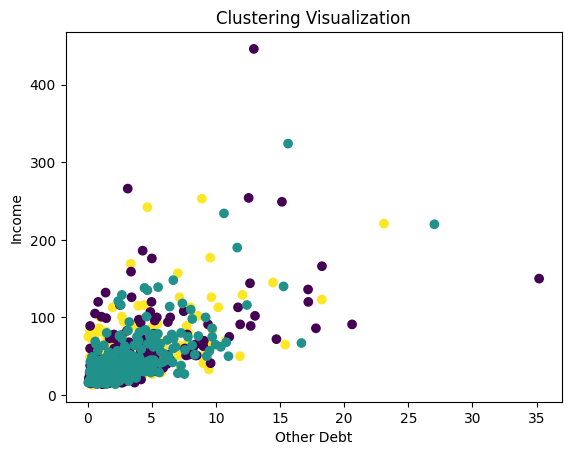

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data from the CSV file
data = pd.read_csv('dataset2.csv')

data['Defaulted'].fillna(1, inplace=True)  # Fill missing values with 0

df = pd.DataFrame(data)

# Drop a single column
df = df.drop('Customer Id', axis=1)

# Perform one-hot encoding for categorical data
data_encoded = pd.get_dummies(data)

# Clustering on the mixed dataset (including one-hot encoded and numeric features)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_encoded)

# Add cluster assignments back to the original dataframe
data['CLUSTER'] = clusters

# Create a scatter plot to visualize the clusters (assuming 2D data for simplicity)
plt.scatter(data['Other Debt'], data['Income'], c=data['CLUSTER'], cmap='viridis')
plt.xlabel('Other Debt')
plt.ylabel('Income')
plt.title('Clustering Visualization')
plt.show()


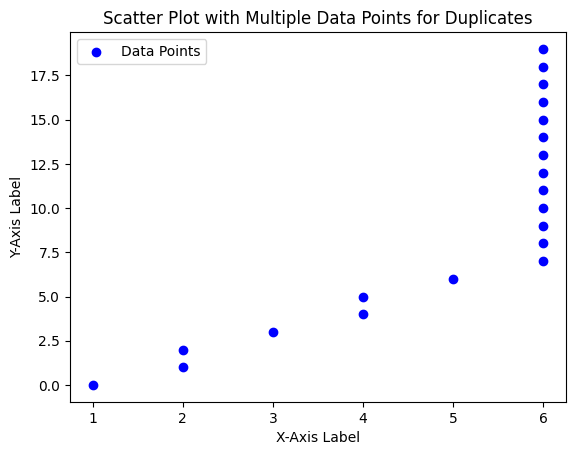

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Your list of x-values with duplicates
x_values_with_duplicates = [1, 2, 2, 3, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

# Your corresponding y-values (adjust this list accordingly)
y_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Create lists to store the expanded x and y values
expanded_xpoints = []
expanded_ypoints = []

# Iterate through unique x-values and add data points based on their frequency
for x in sorted(set(x_values_with_duplicates)):
    frequency = x_values_with_duplicates.count(x)
    expanded_xpoints.extend([x] * frequency)
    expanded_ypoints.extend(y_values[:frequency])
    y_values = y_values[frequency:]

# Convert lists to NumPy arrays
xpoints = np.array(expanded_xpoints)
ypoints = np.array(expanded_ypoints)

# Create a scatter plot
plt.scatter(xpoints, ypoints, marker='o', color='blue', label='Data Points')

# Label the axes
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add a title
plt.title('Scatter Plot with Multiple Data Points for Duplicates')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37, cost: 3094.0
Run 1, iteration: 2/100, moves: 2, cost: 3094.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 161, cost: 3119.0
Run 2, iteration: 2/100, moves: 8, cost: 3119.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 57, cost: 3108.0
Run 3, iteration: 2/100, moves: 4, cost: 3108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 16, cost: 3429.0
Run 4, iteration: 2/100, moves: 0, cost: 3429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 23, cost: 2990.0
Best run was number 5


/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


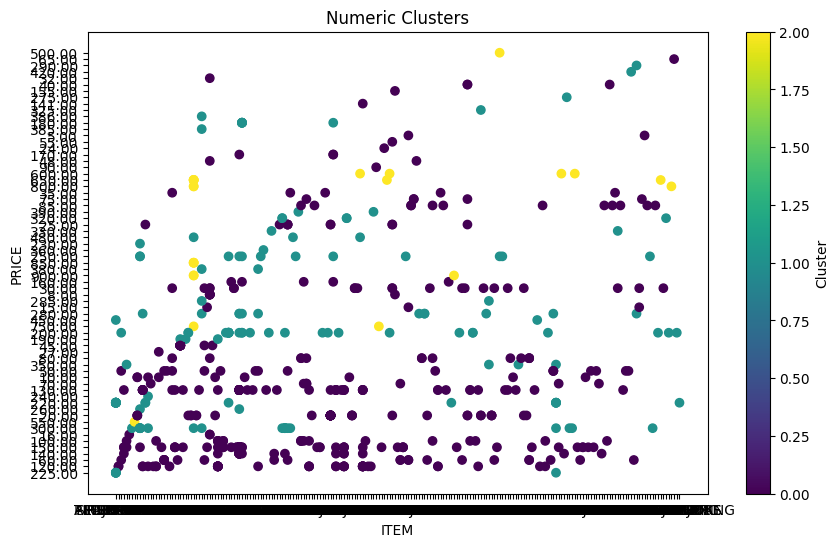

In [81]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('dataset.csv')

df = pd.DataFrame(data)

# Drop a single column
df = df.drop('ID', axis=1)

# Handle missing values in the 'QUANTITY' column (you can choose your preferred method)
data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0

# Remove the ₱ symbol from the "PRICE" column
data['PRICE'] = data['PRICE'].str.replace('₱', '')

# Separate categorical and numeric columns
categorical_columns = ["TRANSACTION", "BRAND", "ITEM"]
numeric_columns = ["QUANTITY", "PRICE"]

# Perform one-hot encoding for categorical data
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Clustering for one-hot encoded data (categorical)
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
categorical_clusters = km.fit_predict(data_encoded)

# Clustering for numeric data
kmeans = KMeans(n_clusters=3)
numeric_data = data[numeric_columns]
numeric_clusters = kmeans.fit_predict(numeric_data)

# Add the cluster assignments back to the original dataframe
data['CATEGORICAL_CLUSTER'] = categorical_clusters
data['NUMERIC_CLUSTER'] = numeric_clusters

# Plotting the clusters for numeric data
plt.figure(figsize=(10, 6))
plt.scatter(data['ITEM'], data['PRICE'], c=numeric_clusters, cmap='viridis')
plt.xlabel('ITEM')
plt.ylabel('PRICE')
plt.title('Numeric Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Plotting the clusters for categorical data
# Note: You can create plots specific to your categorical data if it makes sense
# For example, you could use bar plots for TRANSACTION, BRAND, and ITEM clusters.

# For reference, here's how you can create bar plots for the categorical clusters:
# for col in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     data.groupby(['CATEGORICAL_CLUSTER', col]).size().unstack().plot(kind='bar', stacked=True)
#     plt.title(f'{col} Clusters')
#     plt.xlabel('Cluster')
#     plt.ylabel('Count')
#     plt.show()


In [82]:
import pandas as pd

In [83]:
data = pd.read_csv('dataset.csv')

# Remove the ₱ symbol from the "PRICE" column
data['PRICE'] = data['PRICE'].str.replace('₱', '')

In [84]:
cat_columns = ['TRANSACTION', 'BRAND', 'ITEM', 'DATE']

In [85]:
# Handle missing values in the 'QUANTITY' column (you can choose your preferred method)
data['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0

In [86]:
df = pd.DataFrame(data)

# Drop a single column
df = df.drop('ID', axis=1)

print(df)

# Use pandas' get_dummies function for one-hot encoding
data_encoded = pd.get_dummies(data, columns=cat_columns)

# Now, data_encoded contains one-hot encoded categorical columns

# You can use data_encoded with data.describe() or other numerical operations
# print(data_encoded.describe())
print(data_encoded)


    TRANSACTION  BRAND             ITEM  QUANTITY   PRICE        DATE
0            T1  HONDA       PETRON OIL       1.0  225.00  01/03/2023
1            T1  HONDA      TIRE SYLANT       1.0  120.00  01/03/2023
2            T1  HONDA             PITO       1.0   60.00  01/03/2023
3            T1  HONDA        TIRE GOMA       1.0  140.00  01/03/2023
4            T1  HONDA        TIRE GOMA       1.0  150.00  01/03/2023
..          ...    ...              ...       ...     ...         ...
595        T123   RUSI  IGNITION SWITCH       1.0  500.00  03/09/2023
596        T123   RUSI   THROTTLE CABLE       1.0  100.00  03/09/2023
597        T123   RUSI       AIR FILTER       1.0  150.00  03/09/2023
598        T123   RUSI    CLUTCH SPRING       1.0  220.00  03/09/2023
599        T123   RUSI             TAPE       1.0   20.00  03/09/2023

[600 rows x 6 columns]
      ID  QUANTITY   PRICE  TRANSACTION_T1  TRANSACTION_T10  TRANSACTION_T100  \
0      1       1.0  225.00            True            F

In [87]:
data_encoded.head()

,ID,QUANTITY,PRICE,TRANSACTION_T1,TRANSACTION_T10,TRANSACTION_T100,TRANSACTION_T101,TRANSACTION_T102,TRANSACTION_T103,TRANSACTION_T104,...,DATE_02/28/2023,DATE_03/01/2023,DATE_03/02/2023,DATE_03/03/2023,DATE_03/04/2023,DATE_03/05/2023,DATE_03/06/2023,DATE_03/07/2023,DATE_03/08/2023,DATE_03/09/2023
0,1,1.0,225.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,120.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,60.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1.0,140.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1.0,150.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
data.describe()

,ID,QUANTITY
count,600.000000,600.000000
mean,300.500000,1.066667
std,173.349358,0.720940
min,1.000000,1.000000
25%,150.750000,1.000000
50%,300.500000,1.000000
75%,450.250000,1.000000
max,600.000000,17.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           600 non-null    int64  
 1   TRANSACTION  600 non-null    object 
 2   BRAND        600 non-null    object 
 3   ITEM         600 non-null    object 
 4   QUANTITY     600 non-null    float64
 5   PRICE        600 non-null    object 
 6   DATE         600 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.9+ KB
